# Exploratory Data Analysis using Python - A Case Study

## Introduction

In this tutorial, we'll analyze the StackOverflow developer survey dataset. The dataset contains responses to an annual survey conducted by StackOverflow. You can find the raw data & official analysis here: https://insights.stackoverflow.com/survey.

There are several options for getting the dataset into Jupyter:

- Download the CSV manually and upload it via Jupyter's GUI
- Use the `urlretrieve` function from the `urllib.request` to download CSV files from a raw URL
- Use a helper library, e.g., [`opendatasets`](https://github.com/JovianML/opendatasets), which contains a collection of curated datasets and provides a helper function for direct download.

We'll use the `opendatasets` helper library to download the files.

In [1]:
#import opendatasets as od

In [3]:
# od.download('stackoverflow-developer-survey-2020')

Let's verify that the dataset was downloaded into the directory `stackoverflow-developer-survey-2020` and retrieve the list of files in the dataset.

In [10]:
import os

In [11]:
os.listdir("stackoverflow 2021")

['README_2021.txt',
 'so_survey_2021.pdf',
 'survey_results_public.csv',
 'survey_results_schema.csv']

You can through the downloaded files using the "File" > "Open" menu option in Jupyter. It seems like the dataset contains three fiInformationles:

- `README.txt` -  about the dataset
- `survey_results_schema.csv` - The list of questions, and shortcodes for each question
- `survey_results_public.csv` - The full list of responses to the questions 

Let's load the CSV files using the Pandas library. We'll use the name `survey_raw_df` for the data frame to indicate this is unprocessed data that we might clean, filter, and modify to prepare a data frame ready for analysis.


In [12]:
import pandas as pd

In [14]:
survey_raw_df=pd.read_csv('stackoverflow 2021/survey_results_public.csv')

In [16]:
survey_raw_df

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0
1,2,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,...,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN
2,3,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",NaN,...,18-24 years old,Man,No,Prefer not to say,Prefer not to say,None of the above,None of the above,Appropriate in length,Easy,NaN
3,4,I am a developer by profession,Employed full-time,Austria,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,NaN,NaN,...,35-44 years old,Man,No,Straight / Heterosexual,White or of European descent,I am deaf / hard of hearing,NaN,Appropriate in length,Neither easy nor difficult,NaN
4,5,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,NaN,England,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,Friend or family member,17,...,25-34 years old,Man,No,NaN,White or of European descent,None of the above,NaN,Appropriate in length,Easy,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83434,83435,I am a developer by profession,Employed full-time,United States of America,Texas,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",6,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,I have a concentration and/or memory disorder ...,Appropriate in length,Easy,160500.0
83435,83436,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Benin,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",4,...,18-24 years old,Man,No,Straight / Heterosexual,Black or of African descent,None of the above,None of the above,Appropriate in length,Easy,3960.0
83436,83437,I am a developer by profession,Employed full-time,United States of America,New Jersey,NaN,"Secondary school (e.g. American high school, G...",11 - 17 years,School,10,...,25-34 years old,Man,No,NaN,White or of European descent,None of the above,None of the above,Appropriate in length,Neither easy nor difficult,90000.0
83437,83438,I am a developer by profession,Employed full-time,Canada,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,Online Courses or Certification;Books / Physic...,5,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,I have a mood or emotional disorder (e.g. depr...,Appropriate in length,Neither easy nor difficult,816816.0


The dataset contains over 83000   responses to 48 questions (although many questions are optional). The responses have been anonymized to remove personally identifiable information, and each respondent has been assigned a randomized respondent ID.

Let's view the list of columns in the data frame. 

In [17]:
survey_raw_df.columns

Index(['ResponseId', 'MainBranch', 'Employment', 'Country', 'US_State',
       'UK_Country', 'EdLevel', 'Age1stCode', 'LearnCode', 'YearsCode',
       'YearsCodePro', 'DevType', 'OrgSize', 'Currency', 'CompTotal',
       'CompFreq', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith',
       'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith',
       'PlatformHaveWorkedWith', 'PlatformWantToWorkWith',
       'WebframeHaveWorkedWith', 'WebframeWantToWorkWith',
       'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith',
       'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith',
       'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'OpSys',
       'NEWStuck', 'NEWSOSites', 'SOVisitFreq', 'SOAccount', 'SOPartFreq',
       'SOComm', 'NEWOtherComms', 'Age', 'Gender', 'Trans', 'Sexuality',
       'Ethnicity', 'Accessibility', 'MentalHealth', 'SurveyLength',
       'SurveyEase', 'ConvertedCompYearly'],
      dtype='object')

It appears that shortcodes for questions have been used as column names. 

We can refer to the schema file to see the full text of each question. The schema file contains only two columns: `Column` and `QuestionText`. We can load it as Pandas Series with `Column` as the index and the  `QuestionText` as the value.

In [21]:
pd.read_csv('stackoverflow 2021/survey_results_schema.csv')

,qid,qname,question,force_resp,type,selector
0,QID16,S0,"<div><span style=""font-size:19px;""><strong>Hel...",False,DB,TB
1,QID12,MetaInfo,Browser Meta Info,False,Meta,Browser
2,QID1,S1,"<span style=""font-size:22px; font-family: aria...",False,DB,TB
3,QID2,MainBranch,Which of the following options best describes ...,True,MC,SAVR
4,QID24,Employment,Which of the following best describes your cur...,False,MC,MAVR
5,QID6,Country,"Where do you live? <span style=""font-weight: b...",True,MC,DL
6,QID7,US_State,<p>In which state or territory of the USA do y...,False,MC,DL
7,QID9,UK_Country,In which part of the United Kingdom do you liv...,False,MC,DL
8,QID190,S2,"<span style=""font-size:22px; font-family: aria...",False,DB,TB
9,QID25,EdLevel,Which of the following best describes the high...,False,MC,SAVR


In [22]:
schema_fname='stackoverflow 2021/survey_results_schema.csv'

In [39]:
schema_raw=pd.read_csv(schema_fname,index_col='qname').question

In [49]:
#schema_raw.unique()

In [25]:
type(schema_raw)

pandas.core.series.Series

We can now use `schema_raw` to retrieve the full question text for any column in `survey_raw_df`.

In [26]:
schema_raw.SurveyLength

'How do you feel about the length of the survey this year?'

In [27]:
schema_raw['YearsCodePro']

'NOT including education, how many years have you coded professionally (as a part of your work)?'

In [28]:
schema_raw.Age

'What is your age?'

We've now loaded the dataset. We're ready to move on to the next step of preprocessing & cleaning the data for our analysis.

## Data Preparation & Cleaning

While the survey responses contain a wealth of information, we'll limit our analysis to the following areas:

- Demographics of the survey respondents and the global programming community
- Distribution of programming skills, experience, and preferences
- Employment-related information, preferences, and opinions

Let's select a subset of columns with the relevant data for our analysis.

In [61]:
selected_columns = [
    # Demographics
    'Country',
    'Age',
    'Gender',
    'EdLevel',
    # Programming experience
    'Age1stCode',
    'YearsCode',
    'YearsCodePro',
    'NEWStuck',
    # Employment
    'Employment',
    'DevType',
    'LearnCode',
    'MainBranch'
]

In [62]:
len(selected_columns)

12

Let's extract a copy of the data from these columns into a new data frame `survey_df`. We can continue to modify further without affecting the original data frame.

In [63]:
survey_df=survey_raw_df[selected_columns].copy()

In [64]:
schema=schema_raw[selected_columns]

Let's view some basic information about the data frame.

In [65]:
survey_df.shape

(83439, 12)

In [66]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83439 entries, 0 to 83438
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Country       83439 non-null  object
 1   Age           82407 non-null  object
 2   Gender        82286 non-null  object
 3   EdLevel       83126 non-null  object
 4   Age1stCode    83243 non-null  object
 5   YearsCode     81641 non-null  object
 6   YearsCodePro  61216 non-null  object
 7   NEWStuck      83052 non-null  object
 8   Employment    83323 non-null  object
 9   DevType       66484 non-null  object
 10  LearnCode     82963 non-null  object
 11  MainBranch    83439 non-null  object
dtypes: object(12)
memory usage: 7.6+ MB


Most columns have the data type `object`, either because they contain values of different types or contain empty values (`NaN`). It appears that every column contains some empty values since the Non-Null count for every column is lower than the total number of rows (83439). We'll need to deal with empty values and manually adjust the data type for each column on a case-by-case basis. 

Only two of the columns were detected as numeric columns (`Age` and `WorkWeekHrs`), even though a few other columns have mostly numeric values. To make our analysis easier, let's convert some other columns into numeric data types while ignoring any non-numeric value. The non-numeric are converted to `NaN`.

In [72]:
survey_df.Age1stCode.unique()

array([nan])

In [73]:
survey_df['Age1stCode']=pd.to_numeric(survey_df.Age1stCode,errors='coerce')

In [74]:
survey_df['Age1stCode'] = pd.to_numeric(survey_df.Age1stCode, errors='coerce')
survey_df['YearsCode'] = pd.to_numeric(survey_df.YearsCode, errors='coerce')
survey_df['YearsCodePro'] = pd.to_numeric(survey_df.YearsCodePro, errors='coerce')

Let's now view some basic statistics about numeric columns.

In [76]:
survey_df.describe()

,Age1stCode,YearsCode,YearsCodePro
count,0.0,79982.000000,58467.000000
mean,NaN,12.485722,9.572511
std,NaN,9.626184,8.123225
min,NaN,1.000000,1.000000
25%,NaN,5.000000,4.000000
50%,NaN,10.000000,7.000000
75%,NaN,17.000000,13.000000
max,NaN,50.000000,50.000000


In [77]:
survey_df['Gender'].value_counts()

Man                                                                                   74817
Woman                                                                                  4120
Prefer not to say                                                                      1442
Non-binary, genderqueer, or gender non-conforming                                       690
Or, in your own words:                                                                  413
Man;Or, in your own words:                                                              268
Man;Non-binary, genderqueer, or gender non-conforming                                   252
Woman;Non-binary, genderqueer, or gender non-conforming                                 147
Man;Woman                                                                                41
Non-binary, genderqueer, or gender non-conforming;Or, in your own words:                 21
Man;Woman;Non-binary, genderqueer, or gender non-conforming                     

In [78]:
import numpy as np

In [79]:
survey_df.where(~(survey_df.Gender.str.contains(';', na=False)), np.nan, inplace=True)

In [80]:
survey_df.sample(10)

,Country,Age,Gender,EdLevel,Age1stCode,YearsCode,YearsCodePro,NEWStuck,Employment,DevType,LearnCode,MainBranch
2014,United States of America,25-34 years old,Man,"Associate degree (A.A., A.S., etc.)",NaN,6.0,6.0,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,"Developer, front-end;Developer, full-stack",NaN,I am a developer by profession
34415,Denmark,25-34 years old,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,16.0,5.0,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Developer, front-end;Developer, full-stack;Dev...","Other online resources (ex: videos, blogs, etc...",I am a developer by profession
16602,Bosnia and Herzegovina,35-44 years old,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NaN,24.0,19.0,Visit Stack Overflow;Watch help / tutorial vid...,Employed full-time,"Developer, mobile;Developer, desktop or enterp...","Other online resources (ex: videos, blogs, etc...",I am a developer by profession
76858,United States of America,18-24 years old,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NaN,4.0,2.0,Visit Stack Overflow,Employed full-time,"Engineer, data;Data or business analyst","Other online resources (ex: videos, blogs, etc...",I am a developer by profession
44839,Netherlands,18-24 years old,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NaN,5.0,NaN,Call a coworker or friend;Visit Stack Overflow...,Employed part-time,"Developer, full-stack;Student","Other online resources (ex: videos, blogs, etc...",I am a student who is learning to code
69137,United States of America,Under 18 years old,Man,"Secondary school (e.g. American high school, G...",NaN,4.0,NaN,Visit Stack Overflow;Google it;Do other work a...,I prefer not to say,NaN,Coding Bootcamp;Other online resources (ex: vi...,I code primarily as a hobby
64317,Australia,35-44 years old,Man,"Secondary school (e.g. American high school, G...",NaN,6.0,NaN,Visit Stack Overflow;Google it;Watch help / tu...,"Not employed, and not looking for work",NaN,"Other online resources (ex: videos, blogs, etc...",I code primarily as a hobby
51994,United States of America,35-44 years old,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NaN,30.0,20.0,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Developer, front-end;Developer, desktop or ent...","Other online resources (ex: videos, blogs, etc...",I am a developer by profession
14467,United Kingdom of Great Britain and Northern I...,25-34 years old,Woman,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NaN,12.0,7.0,Visit Stack Overflow;Google it;Do other work a...,Employed full-time,"Developer, game or graphics",School;Friend or family member,I am a developer by profession
82990,Norway,18-24 years old,Man,Some college/university study without earning ...,NaN,6.0,2.0,Visit Stack Overflow;Google it,Employed full-time,"Developer, front-end;Developer, full-stack;Dev...","Other online resources (ex: videos, blogs, etc...",I am a developer by profession


## Exploratory Analysis and Visualization

Before we ask questions about the survey responses, it would help to understand the respondents' demographics, i.e., country, age, gender, education level, employment level, etc. It's essential to explore these variables to understand how representative the survey is of the worldwide programming community. A survey of this scale generally tends to have some [selection bias](https://en.wikipedia.org/wiki/Selection_bias).

Let's begin by importing `matplotlib.pyplot` and `seaborn`.

In [3]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### Country

Let's look at the number of countries from which there are responses in the survey and plot the ten countries with the highest number of responses.

In [104]:
schema.Country

'Where do you live? <span style="font-weight: bolder;">*</span>'

In [105]:
survey_df.Country.nunique()

180

We can identify the countries with the highest number of respondents using the `value_counts` method.

In [106]:
top_countries=survey_df.Country.value_counts().head(15)

In [107]:
top_countries

United States of America                                15051
India                                                   10476
Germany                                                  5568
United Kingdom of Great Britain and Northern Ireland     4447
Canada                                                   2983
France                                                   2685
Brazil                                                   2232
Poland                                                   1785
Netherlands                                              1759
Italy                                                    1659
Australia                                                1627
Spain                                                    1472
Russian Federation                                       1462
Sweden                                                   1179
Turkey                                                   1050
Name: Country, dtype: int64

We can visualize this information using a bar chart.

NameError: name 'schema' is not defined

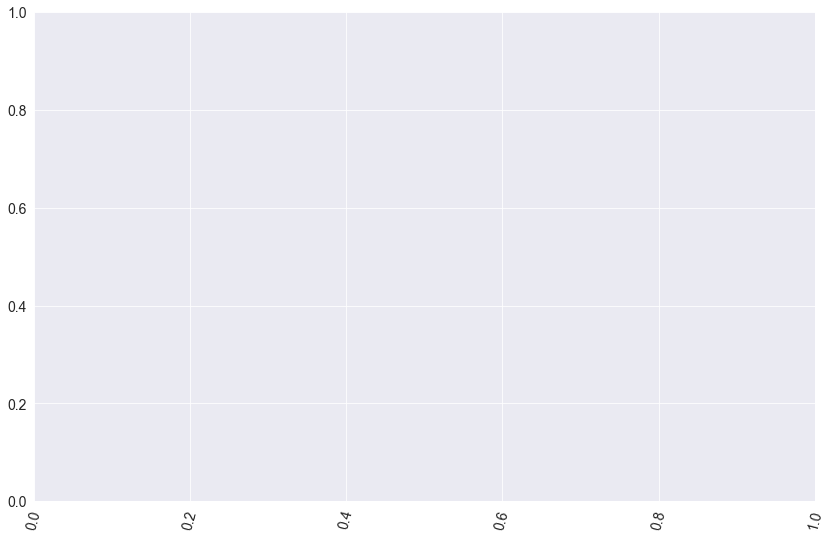

In [4]:
plt.figure(figsize=(14,9))
plt.xticks(rotation=75)
plt.title(schema.Country)
sns.barplot(x=top_countries.index,y=top_countries);

It appears that a disproportionately high number of respondents are from the US and India, probably because the survey is in English, and these countries have the highest English-speaking populations. We can already see that the survey may not be representative of the global programming community - especially from non-English speaking countries. Programmers from non-English speaking countries are almost certainly underrepresented.

**Exercise**:
Try finding the percentage of responses from English-speaking vs. non-English speaking countries. You can use [this list of languages spoken in different countries](https://github.com/JovianML/opendatasets/blob/master/data/countries-languages-spoken/countries-languages.csv).

### Age

The distribution of respondents' age is another crucial factor to look at. We can use a histogram to visualize it. 

In [118]:
survey_df.drop(survey_df[survey_df.Age < 10].index, inplace=True)
survey_df.drop(survey_df[survey_df.Age > 70].index, inplace=True)

In [119]:
survey_df['Age'] = pd.to_numeric(survey_df.Age, errors='coerce')

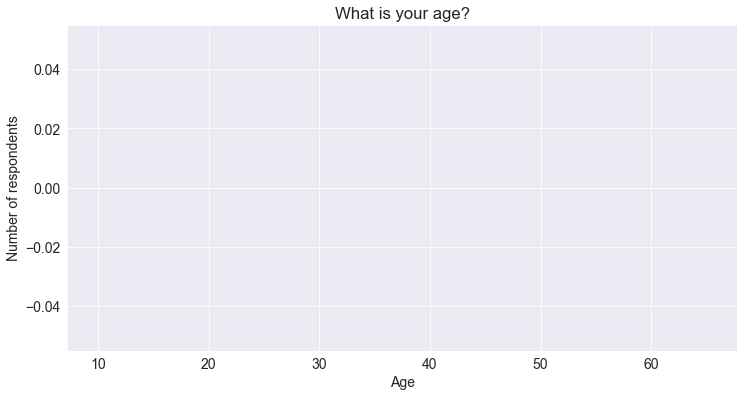

In [120]:
plt.figure(figsize=(12, 6))
plt.title(schema.Age)
plt.xlabel('Age')
plt.ylabel('Number of respondents')

plt.hist(survey_df.Age, bins=np.arange(10,70,5), color='purple');

### Gender

Let's look at the distribution of responses for the Gender. It's a well-known fact that women and non-binary genders are underrepresented in the programming community, so we might expect to see a skewed distribution here.

In [122]:
schema.Gender

'Which of the following describe you, if any? Please check all that apply.'

In [123]:
gender_counts = survey_df.Gender.value_counts()
gender_counts

Man                                                  74817
Woman                                                 4120
Prefer not to say                                     1442
Non-binary, genderqueer, or gender non-conforming      690
Or, in your own words:                                 413
Name: Gender, dtype: int64

A pie chart would be a great way to visualize the distribution.

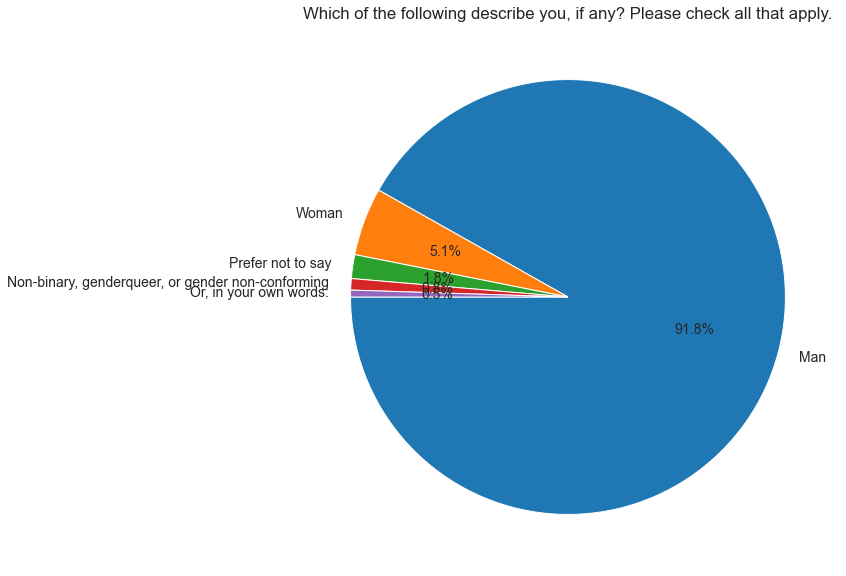

In [127]:
plt.figure(figsize=(20,10))
plt.title(schema.Gender)
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=180);

### Education Level

Formal education in computer science is often considered an essential requirement for becoming a programmer. However, there are many free resources & tutorials available online to learn programming. Let's compare the education levels of respondents to gain some insight into this. We'll use a horizontal bar plot here.

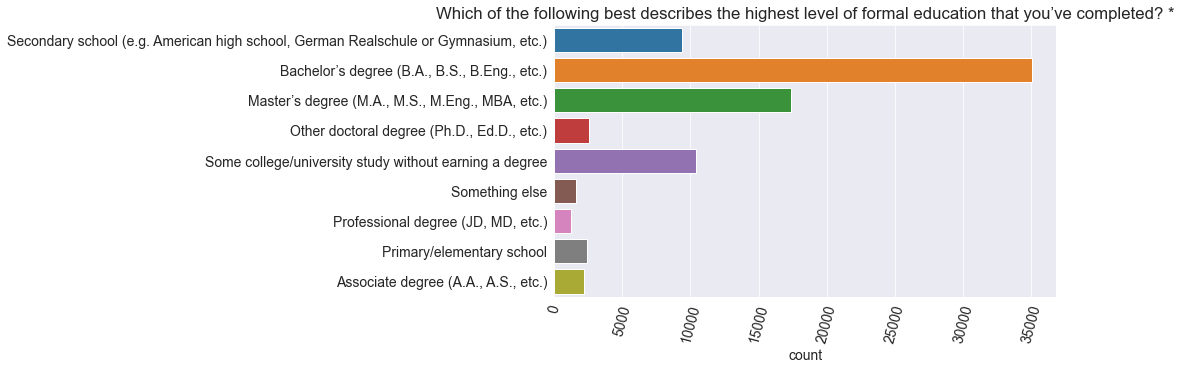

In [128]:
sns.countplot(y=survey_df.EdLevel)
plt.xticks(rotation=75);
plt.title(schema['EdLevel'])
plt.ylabel(None);

It appears that well over half of the respondents hold a bachelor's or master's degree, so most programmers seem to have some college education. However, it's not clear from this graph alone if they hold a degree in computer science.

**Exercises**: The graph currently shows the number of respondents for each option. Can you modify it to show the percentage instead? Further, try comparing the percentages for each degree for men vs. women. 

In [129]:
schema.Employment

'Which of the following best describes your current <b>employment status</b>?'

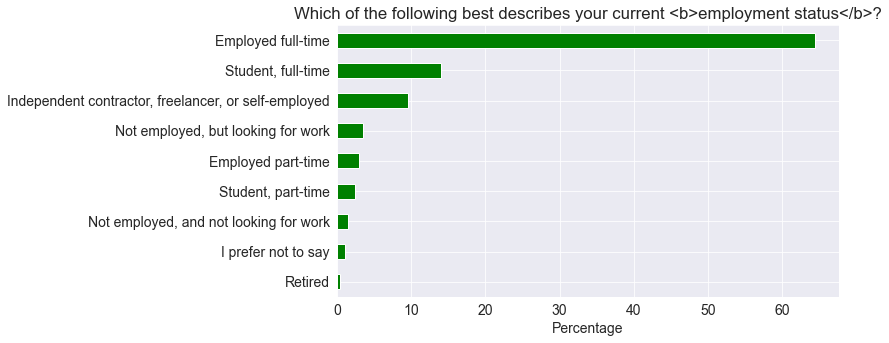

In [130]:
(survey_df.Employment.value_counts(normalize=True, ascending=True)*100).plot(kind='barh', color='g')
plt.title(schema.Employment)
plt.xlabel('Percentage');

In [131]:
schema.DevType

'Which of the following describes your current job? Please select all that apply.'

In [132]:
survey_df.DevType.value_counts()

Developer, full-stack                                                                                                                                                                                      8548
Developer, back-end                                                                                                                                                                                        5432
Developer, front-end                                                                                                                                                                                       2388
Developer, front-end;Developer, full-stack;Developer, back-end                                                                                                                                             2127
Developer, full-stack;Developer, back-end                                                                                                                               

Let's define a helper function that turns a column containing lists of values (like `survey_df.DevType`) into a data frame with one column for each possible option.

In [133]:
def split_multicolumn(col_series):
    result_df = col_series.to_frame()
    options = []
    # Iterate over the column
    for idx, value  in col_series[col_series.notnull()].iteritems():
        # Break each value into list of options
        for option in value.split(';'):
            # Add the option as a column to result
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
            # Mark the value in the option column as True
            result_df.at[idx, option] = True
    return result_df[options]

In [134]:
dev_type_df = split_multicolumn(survey_df.DevType)

In [135]:
dev_type_df

,"Developer, mobile","Developer, front-end","Developer, desktop or enterprise applications","Developer, full-stack","Engineer, data",Other (please specify):,Data scientist or machine learning specialist,"Developer, back-end",Academic researcher,Database administrator,...,DevOps specialist,Data or business analyst,Designer,Engineering manager,"Engineer, site reliability",System administrator,Product manager,"Senior Executive (C-Suite, VP, etc.)",Educator,Marketing or sales professional
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,True,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83434,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
83435,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
83436,False,False,False,False,False,False,True,False,False,False,...,True,False,False,False,False,False,False,False,False,False
83437,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


The `dev_type_df` has one column for each option that can be selected as a response. If a respondent has chosen an option, the corresponding column's value is `True`. Otherwise, it is `False`.

We can now use the column-wise totals to identify the most common roles.


In [136]:
dev_type_totals = dev_type_df.sum().sort_values(ascending=False)
dev_type_totals

Developer, full-stack                            32619
Developer, back-end                              28817
Developer, front-end                             18065
Developer, desktop or enterprise applications    10930
Developer, mobile                                 9721
DevOps specialist                                 6975
System administrator                              5996
Database administrator                            5594
Designer                                          4546
Developer, embedded applications or devices       4536
Data scientist or machine learning specialist     4221
Student                                           4127
Engineer, data                                    4122
Engineering manager                               3774
Data or business analyst                          3751
Developer, QA or test                             3559
Other (please specify):                           3482
Product manager                                   3035
Academic r

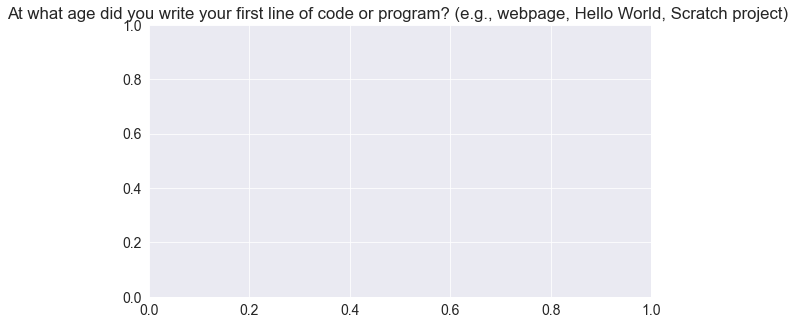